In [1]:
!pip install imblearn==0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 20.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install mlxtend==0.22.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix, recall_score, precision_score
from imblearn.pipeline import Pipeline as IMBPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from scipy.stats import loguniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from scipy.stats import uniform
from sklearn.metrics import accuracy_score







sns.set()
import matplotlib.pyplot as plt
roby=pd.read_csv('/work/-20230509-111654/exams.csv') #Read the file and transform the data in a DataFrame
roby


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


Description: This dataset contains information on the performance of high school students in mathematics, including their grades and demographic information. The data was collected from three high schools in the United States.

Columns:

• Gender: The gender of the student (male/female)

• Race/ethnicity: The student's racial or ethnic background (Asian, African-American, Hispanic, etc.)

• Parental level of education: The highest level of education attained by the student's parent(s) or guardian(s)

• Lunch: Whether the student receives free or reduced-price lunch (yes/no)

• Test preparation course: Whether the student completed a test preparation course (yes/no)

• Math score: The student's score on a standardized mathematics test

• Reading score: The student's score on a standardized reading test

• Writing score: The student's score on a standardized writing test

Read a CSV file and transform the data in a DataFrame.

To have more informations about the data:

In [4]:
# number of rows and columns
roby.shape

(1000, 8)

In [5]:
# informations about null values and the type of data
roby.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# calculates the number of missing values for each column of the DataFrame
roby.isnull().sum(axis=0)


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

As we can see, there are no missing values.

In [7]:
roby.describe(include="all")
# I have a quite overview of the features 


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,male,group C,some college,standard,none,NaN,NaN,NaN
freq,508,323,224,660,656,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,67.810000,70.382000,69.140000
std,NaN,NaN,NaN,NaN,NaN,15.250196,14.107413,15.025917
min,NaN,NaN,NaN,NaN,NaN,15.000000,25.000000,15.000000
25%,NaN,NaN,NaN,NaN,NaN,58.000000,61.000000,59.000000
50%,NaN,NaN,NaN,NaN,NaN,68.000000,70.500000,70.000000
75%,NaN,NaN,NaN,NaN,NaN,79.250000,80.000000,80.000000


In [8]:
# counting the values of each category in the column "gender"
roby["gender"].value_counts()

male      508
female    492
Name: gender, dtype: int64

In [9]:
# counting the values of each category in the column "race/ethnicity"
roby["race/ethnicity"].value_counts()


group C    323
group D    257
group B    198
group E    143
group A     79
Name: race/ethnicity, dtype: int64

In [10]:
# counting the values of each category in the column "parental level of education"
roby["parental level of education"].value_counts()


some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: parental level of education, dtype: int64

In [11]:
# counting the values of each category in the column "test preparation course"
roby["test preparation course"].value_counts()


none         656
completed    344
Name: test preparation course, dtype: int64

Now I want to see the correlation between the math score and reading (then writing) score

/tmp/ipykernel_84/2290273215.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<AxesSubplot: xlabel='reading score', ylabel='math score'>

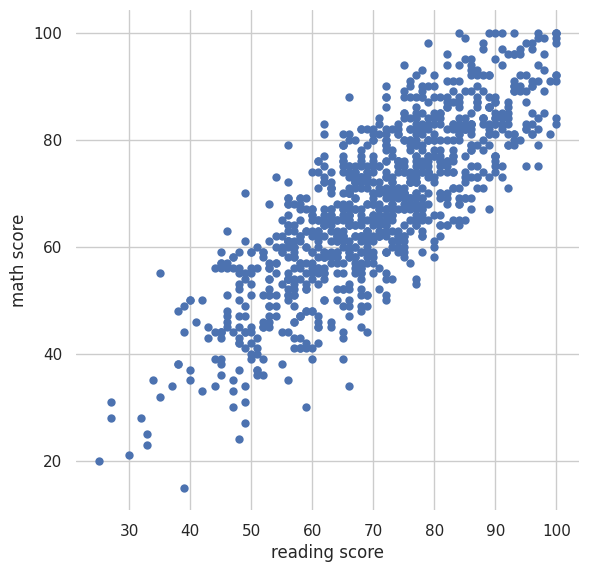

In [12]:
sns.set_theme(style="whitegrid")



# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(
    x="reading score",
    y="math score",
    hue=None,
    size=None,
    palette="ch:r=-.2,d=.3_r",
    hue_order=clarity_ranking,
    sizes=(1, 8),
    linewidth=0,
    data=roby,
    ax=ax,
)


 Directly proportional correlation

/tmp/ipykernel_84/2615924927.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<AxesSubplot: xlabel='writing score', ylabel='math score'>

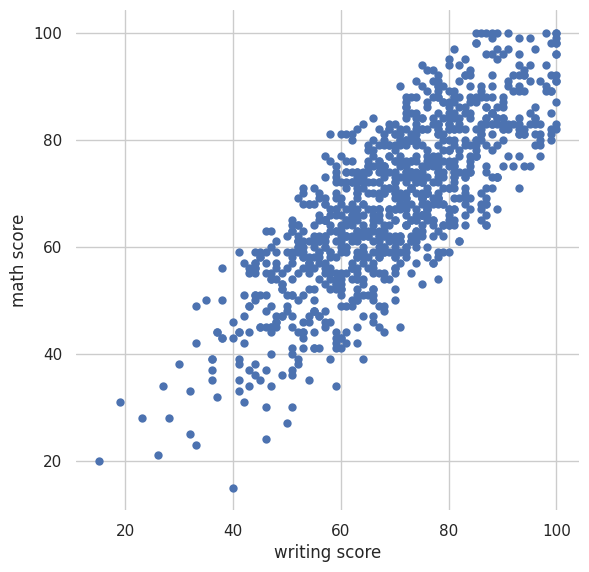

In [13]:
sns.set_theme(style="whitegrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(
    x="writing score",
    y="math score",
    hue=None,
    size=None,
    palette="ch:r=-.2,d=.3_r",
    hue_order=clarity_ranking,
    sizes=(1, 8),
    linewidth=0,
    data=roby,
    ax=ax,
)


In [14]:
roby = roby.drop('lunch', axis=1) #useless


Transform math grades in 0 and 1 (pass con >=60 o fail con <60). Since I want to predict if a student will pass or not the math exam (binary classification).

In [15]:
colonna_da_modificare = "math score"
roby[colonna_da_modificare] = np.where(roby[colonna_da_modificare] < 60, 0, 1)

roby


,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,female,group D,some college,completed,0,70,78
1,male,group D,associate's degree,none,1,93,87
2,female,group D,some college,none,0,76,77
3,male,group B,some college,none,1,70,63
4,female,group D,associate's degree,none,1,85,86
...,...,...,...,...,...,...,...
995,male,group C,some college,none,1,77,71
996,male,group C,some college,none,1,66,66
997,female,group A,high school,completed,1,86,86
998,male,group E,high school,none,1,72,62


 Create the pipelines (names, transformer, column selector of every transformer in the pipeline) and build the final ColumnTransformer.

In [16]:
pipeline_parentallevelofeducation = Pipeline([
    ('ordinal', OrdinalEncoder(
    categories=[
        [
            "some high school",
            "high school",
            "some college",
            "associate's degree",
            "bachelor's degree",
            "master's degree"
        ]
        ] )),
    ('minmax', MinMaxScaler() )
])

pipeline_gender_race_test = Pipeline([
   
    ('hot', OneHotEncoder(categories='auto',drop='first',handle_unknown='ignore')) 
])

pipeline_writing_reading = Pipeline([
   
    ('writing_reading', MinMaxScaler() )
])

roby_ft = ColumnTransformer(transformers=[
    ('gender_race/ethnicity_testpreparationcourse',pipeline_gender_race_test ,['gender','race/ethnicity','test preparation course']),
   
    ('parentallevelofeducation',pipeline_parentallevelofeducation , ['parental level of education'] ),
    ('writing_reading',pipeline_writing_reading , ['writing score', 'reading score'] )
   
],
remainder='passthrough',#keep the columns that are not considered in the transformation
verbose_feature_names_out=True, #do not report the name of the transformation in the name of the columns
sparse_threshold=0 #dense matrix
)

newr = pd.DataFrame(roby_ft.fit_transform(roby), columns=roby_ft.get_feature_names_out())
newr



,gender_race/ethnicity_testpreparationcourse__gender_male,gender_race/ethnicity_testpreparationcourse__race/ethnicity_group B,gender_race/ethnicity_testpreparationcourse__race/ethnicity_group C,gender_race/ethnicity_testpreparationcourse__race/ethnicity_group D,gender_race/ethnicity_testpreparationcourse__race/ethnicity_group E,gender_race/ethnicity_testpreparationcourse__test preparation course_none,parentallevelofeducation__parental level of education,writing_reading__writing score,writing_reading__reading score,remainder__math score
0,0.0,0.0,0.0,1.0,0.0,0.0,0.4,0.741176,0.600000,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.6,0.847059,0.906667,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.4,0.729412,0.680000,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.4,0.564706,0.600000,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.6,0.835294,0.800000,1.0
...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,1.0,0.0,0.0,1.0,0.4,0.658824,0.693333,1.0
996,1.0,0.0,1.0,0.0,0.0,1.0,0.4,0.600000,0.546667,1.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.835294,0.813333,1.0
998,1.0,0.0,0.0,0.0,1.0,1.0,0.2,0.552941,0.626667,1.0


     -1 means that the two variables have an inverse linear relationship,
     1 means that the two variables have a direct linear relationship,
     0 means that a linear trend cannot be established between the two variables.


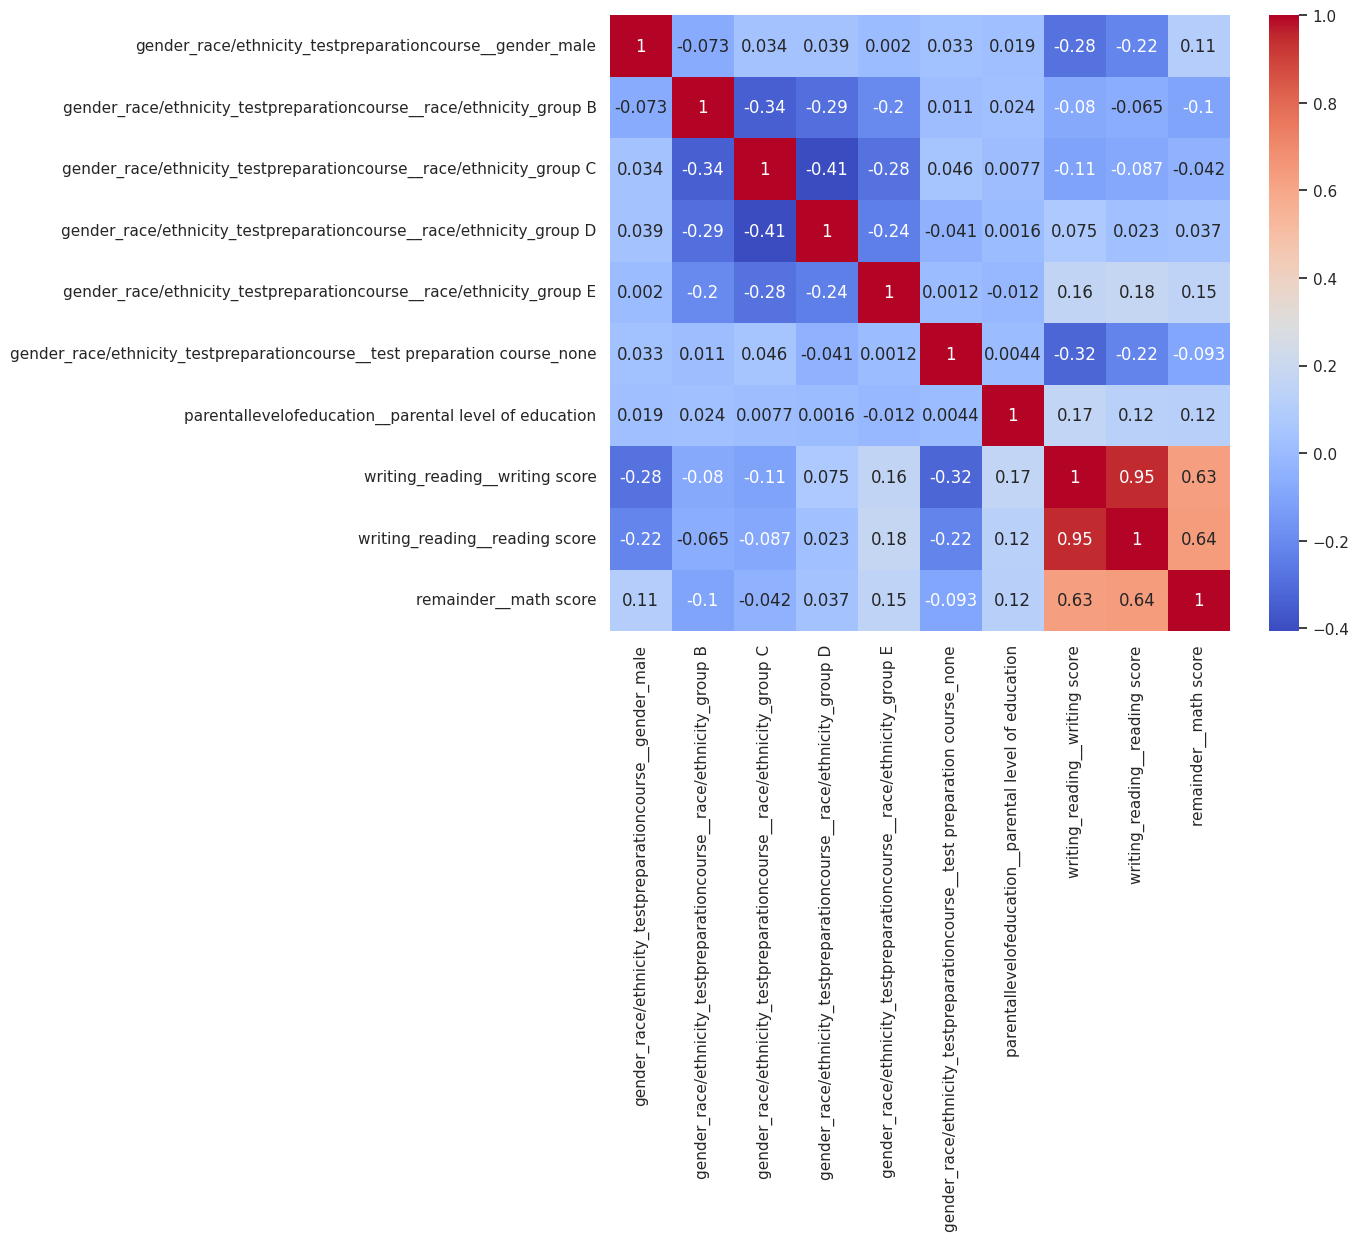

In [17]:
correlation_matrix = newr.corr()

# Crea un heatmap della matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

SPLIT THE DATASET IN TRAINING AND TEST SET

In [18]:

X_train, X_test, y_train, y_test =train_test_split(roby.drop('math score', axis=1), roby['math score'],test_size=0.2,random_state=0)

In [19]:
model_pipeline = IMBPipeline([
    ('trans', roby_ft),
    ('sampler', SMOTE()),
    ('dim_reduction', PCA(n_components=0.8)),
    ('classifier', Perceptron())
])

Use fit method and the predict to verify if errors occur:

In [20]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('gender_race/ethnicity_testpreparationcourse',
                                                  Pipeline(steps=[('hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender', 'race/ethnicity',
                                                   'test preparation course']),
                                                 ('parentallevelofeducation',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(ca...
                                                                                               'high '
                                                                                               'school',
                                                                                               'some '
                                                                                               'college',
                                                                                               "associate's "
                                                                                               'degree',
                                                                                               "bachelor's "
                                                                                               'degree',
                                                                                               "master's "
                                                                                               'degree']])),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['parental level of '
                                                   'education']),
                                                 ('writing_reading',
                                                  Pipeline(steps=[('writing_reading',
                                                                   MinMaxScaler())]),
                                                  ['writing score',
                                                   'reading score'])])),
                ('sampler', SMOTE()), ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', Perceptron())])

In [21]:
model_pipeline.predict(X_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1])

Configurations for hyperparameters:

In [22]:
sampler_configs = [
    {
        'sampler':[None],# The element is bypassed
    },
    {
        'sampler':[SMOTE(n_jobs=-1)],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    },
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    }
]

dim_reduction_configs = [
    {
        'dim_reduction': [None]
    },
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [0.5, 0.7, 0.9]
    },
    {
        'dim_reduction': [LDA()]
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10]  
    }
]

classifier_configs = [
    {
        'classifier__eta0' : loguniform(0.001,100), #select an uniform distribution on a logarithmic scale for eta
        'classifier': [Perceptron()] ,
        'classifier__max_iter': [1,5,10,15,50,100] , #maximum number of iterations of the Perceptron during training
        'classifier__class_weight' : [None, 'balanced'] #manage the weight of the classes

    },
    {
        'classifier': [LogisticRegression(solver='saga')],  
        'classifier__C' : loguniform(0.001,100),
        'classifier__penalty': ['l1','l2'], 
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3,5,7,9]
    },
    {
        'classifier' : [RandomForestClassifier()],
        'classifier__n_estimators' : [10,50,100, 500]
    }
]

Build a list of all possible configurations puttinng all the elements together:

In [23]:
all_configs = [dict(itertools.chain(*(e.items() for e in configuration))) for configuration in itertools.product(sampler_configs,dim_reduction_configs,classifier_configs)]

In [24]:
f'Number of all possible configurations: {len(all_configs)}'

'Number of all possible configurations: 48'

In [25]:
all_configs[5:8] #check

[{'sampler': [None],
  'dim_reduction': [PCA()],
  'dim_reduction__n_components': [0.5, 0.7, 0.9],
  'classifier': [LogisticRegression(solver='saga')],
  'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fb43df25280>,
  'classifier__penalty': ['l1', 'l2'],
  'classifier__class_weight': [None, 'balanced']},
 {'sampler': [None],
  'dim_reduction': [PCA()],
  'dim_reduction__n_components': [0.5, 0.7, 0.9],
  'classifier': [KNeighborsClassifier()],
  'classifier__n_neighbors': [3, 5, 7, 9]},
 {'sampler': [None],
  'dim_reduction': [PCA()],
  'dim_reduction__n_components': [0.5, 0.7, 0.9],
  'classifier': [RandomForestClassifier()],
  'classifier__n_estimators': [10, 50, 100, 500]}]

RandomizedSearchCV will perform a random search on the model_pipeline hyperparameters using the specific information in all_configs. 
Different combinations of hyperparameters will be tested and the combination that maximizes the specified evaluation metric 
(scoring='f1') will be selected.

f1 -> evaluation metric used to calculate model performance during cross-validation

In [26]:
rs = RandomizedSearchCV(model_pipeline,
    param_distributions=all_configs,
    n_iter=len(all_configs) * 5,
    n_jobs=-1,
    cv = 2,
    scoring='f1'
)

In [27]:
scores = cross_validate(rs, X_train, y_train, scoring='f1', cv = 5, return_estimator=True, verbose=3) 

Traceback (most recent call last):
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/root/venv/lib/python3.9/site-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/root/venv/lib/python3.9/site-packages/imblearn/pipeline.py", line 250, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/root/venv/lib/python3.9/site-packages/imblearn/pipeline.py", line 422, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "/root/venv/lib/python3.9/site-packages/imblearn/base.py", line 202, in fit_resample
    self._validate_params()
  File "/root/venv/lib/python3.9/site-packages/imblearn/base.py", line 135, in _va

In [28]:
for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index])
    print('-'*10)

None
LinearDiscriminantAnalysis()
KNeighborsClassifier(n_neighbors=9) {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
0.8983050847457628
----------
None
LinearDiscriminantAnalysis()
Perceptron(eta0=2.4932609859031443, max_iter=5) {'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 2.4932609859031443, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 5, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
0.8930232558139534
----------
None
None
LogisticRegression(C=3.168146050404377, penalty='l1', solver='saga') {'C': 3.168146050404377, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 't

In [29]:
for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

F1 on training set:0.93015332197615, F1 on test set:0.9390681003584229
F1 on training set:0.8614232209737828, F1 on test set:0.8695652173913044
F1 on training set:0.9309153713298791, F1 on test set:0.920863309352518
F1 on training set:0.8614232209737828, F1 on test set:0.8695652173913044
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
F1 on training set:0.940465918

(-no sampler   -no dim. reduction   -Logistic Regression )

In [30]:
best_model_pipeline = IMBPipeline([
    ('trans', roby_ft),
    ('classifier',LogisticRegression(solver='saga', penalty = 'l1'))
])

In [31]:
params = {
    'classifier__C': uniform(loc = 15, scale = 60)
}

In [32]:
rs_best = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = params,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3),
    n_iter=20,
    scoring='f1'
)

In [33]:
rs_best.fit(X_train, y_train) 

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/s

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('gender_race/ethnicity_testpreparationcourse',
                                                                               Pipeline(steps=[('hot',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['gender',
                                                                                'race/ethnicity',...
                                                                               ['parental '
                                                                                'level '
                                                                                'of '
                                                                                'education']),
                                                                              ('writing_reading',
                                                                               Pipeline(steps=[('writing_reading',
                                                                                                MinMaxScaler())]),
                                                                               ['writing '
                                                                                'score',
                                                                                'reading '
                                                                                'score'])])),
                                             ('classifier',
                                              LogisticRegression(penalty='l1',
                                                                 solver='saga'))]),
                   n_iter=20,
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb43e2a38e0>},
                   scoring='f1')

In [34]:
rs_best.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('gender_race/ethnicity_testpreparationcourse',
                                                  Pipeline(steps=[('hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender', 'race/ethnicity',
                                                   'test preparation course']),
                                                 ('parentallevelofeducation',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(ca...
                                                                                               'school',
                                                                                               'high '
                                                                                               'school',
                                                                                               'some '
                                                                                               'college',
                                                                                               "associate's "
                                                                                               'degree',
                                                                                               "bachelor's "
                                                                                               'degree',
                                                                                               "master's "
                                                                                               'degree']])),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['parental level of '
                                                   'education']),
                                                 ('writing_reading',
                                                  Pipeline(steps=[('writing_reading',
                                                                   MinMaxScaler())]),
                                                  ['writing score',
                                                   'reading score'])])),
                ('classifier',
                 LogisticRegression(C=17.99362411591779, penalty='l1',
                                    solver='saga'))])

In [35]:
f1_score(y_test, rs_best.best_estimator_.predict(X_test))  

0.9202898550724637

In [36]:

y_train_predicted = rs_best.predict(X_train)
y_test_predicted = rs_best.predict(X_test)

confusion matrix :    TP   FN

                                  FP  TN

In [37]:
confusion_matrix(y_train, y_train_predicted)

array([[183,  42],
       [ 37, 538]])

In [38]:
confusion_matrix(y_test, y_test_predicted)

array([[ 51,   9],
       [ 13, 127]])

In [39]:
accuracy_score(y_train, y_train_predicted)

0.90125

In [40]:
accuracy_score(y_test, y_test_predicted)

0.89

In [41]:
cls = rs_best.best_estimator_

In [42]:
train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-

(0.6, 1.03)

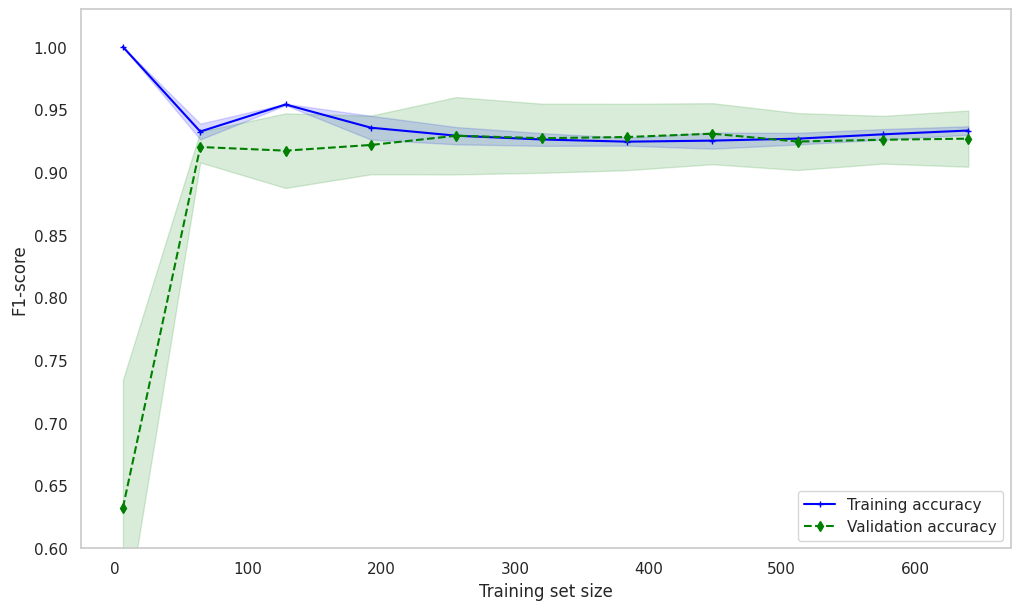

In [43]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.60, 1.03])

In [44]:
range_C = [0.001,0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(cls,
        X=X_train, 
        y=y_train, 
        param_range=
        range_C, 
        param_name='classifier__C',
        cv=5, 
        n_jobs=-1, 
        scoring='f1'
)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/s

(0.05, 25)

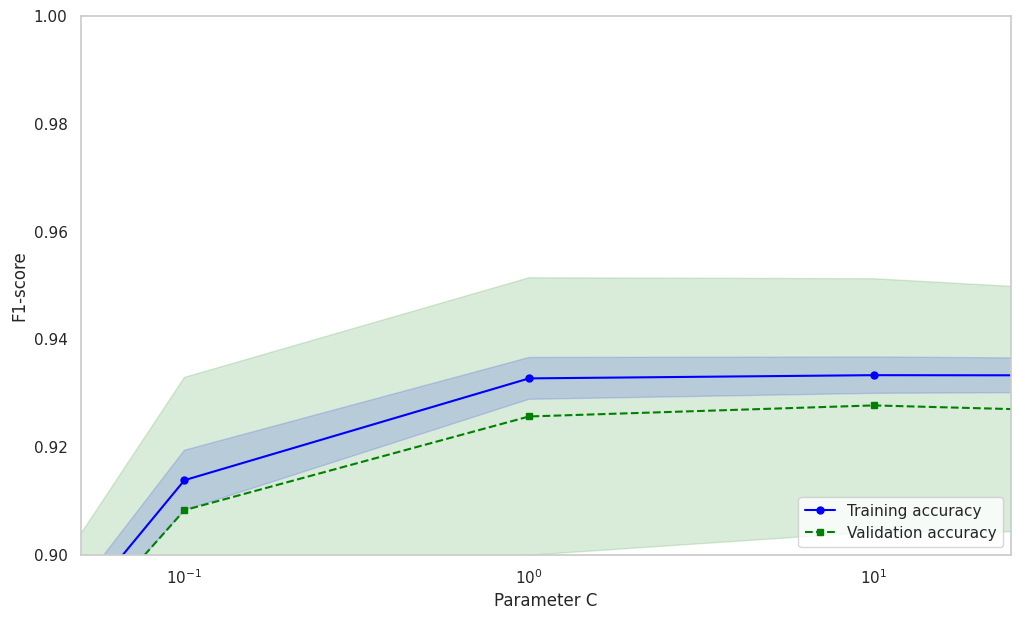

In [45]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_C, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_C,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_C, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_C,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parameter C')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.90, 1])
ax.set_xscale('log')
ax.set_xlim([0.05,25])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d9f8bc77-8408-4561-853b-647b6c673af0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>